## import the nhanes data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('seaborn-white')
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
#GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC

from sklearn import metrics
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# from sklearn.cross_validation import StratifiedKFold

In [2]:
# df_train = pd.read_csv('data_train.csv')
# df_test = pd.read_csv('data_test.csv')

df_train = pd.read_csv('C:\\Users\\lenovo\\dissertation\\data_train.csv')
df_test = pd.read_csv('C:\\Users\\lenovo\\dissertation\\data_test.csv')

print('Training set size:', df_train.shape[0])
print('Test set size:', df_test.shape[0])

Training set size: 12020
Test set size: 3005


In [3]:
df_train

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,BPXSY1,BPXDI1,BMXBMI,SMQ020,LBXTC,PAD615,ALQ101,DIQ010,status
0,47698.0,55.0,1.0,2.0,130.0,80.0,27.8,1.0,176.0,NaN,1.0,2.0,0
1,68073.0,58.0,1.0,4.0,120.0,76.0,26.6,1.0,112.0,NaN,1.0,1.0,0
2,77090.0,43.0,2.0,4.0,138.0,70.0,29.7,2.0,NaN,NaN,NaN,1.0,0
3,43558.0,69.0,1.0,3.0,186.0,102.0,24.1,1.0,138.0,NaN,1.0,1.0,1
4,59274.0,68.0,2.0,1.0,144.0,74.0,26.6,1.0,237.0,NaN,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,77674.0,55.0,2.0,4.0,116.0,50.0,22.2,1.0,226.0,NaN,1.0,2.0,1
12016,74600.0,66.0,2.0,4.0,144.0,42.0,35.1,1.0,200.0,NaN,1.0,2.0,1
12017,66287.0,47.0,1.0,5.0,116.0,78.0,24.7,1.0,232.0,NaN,1.0,2.0,0
12018,76281.0,49.0,2.0,3.0,136.0,60.0,15.2,1.0,207.0,NaN,1.0,2.0,1


## clean the data & process the missing data

In [4]:
# glipse the peoportion
proportion = df_train.isnull().sum(axis=0)/df_train.shape[0]
proportion

SEQN        0.000000
RIDAGEYR    0.000000
RIAGENDR    0.000000
RIDRETH1    0.000000
BPXSY1      0.082862
BPXDI1      0.082862
BMXBMI      0.017055
SMQ020      0.000000
LBXTC       0.059983
PAD615      0.849334
ALQ101      0.095258
DIQ010      0.000000
status      0.000000
dtype: float64

In [5]:
# continous numeirical data in train set
df_train.loc[df_train.RIDAGEYR.isnull(), 'RIDAGEYR'] = df_train.RIDAGEYR.mean()
df_train.loc[df_train.BPXSY1.isnull(), 'BPXSY1'] = df_train.BPXSY1.mean()
df_train.loc[df_train.BMXBMI.isnull(), 'BMXBMI'] = df_train.BMXBMI.mean()
df_train.loc[df_train.LBXTC.isnull(), 'LBXTC'] = df_train.LBXTC.mean()
df_train.loc[df_train.BPXDI1.isnull(), 'BPXDI1'] = df_train.BPXDI1.mean()
df_train.loc[df_train.PAD615.isnull(), 'PAD615'] = df_train.PAD615.mean()

# continous numeirical data in test set
df_test.loc[df_test.RIDAGEYR.isnull(), 'RIDAGEYR'] = df_test.RIDAGEYR.mean()
df_test.loc[df_test.BPXSY1.isnull(), 'BPXSY1'] = df_test.BPXSY1.mean()
df_test.loc[df_test.BMXBMI.isnull(), 'BMXBMI'] = df_test.BMXBMI.mean()
df_test.loc[df_test.LBXTC.isnull(), 'LBXTC'] = df_test.LBXTC.mean()
df_test.loc[df_test.BPXDI1.isnull(), 'BPXDI1'] = df_test.BPXDI1.mean()
df_test.loc[df_test.PAD615.isnull(), 'PAD615'] = df_test.PAD615.mean()

In [6]:
# clean ALQ101
df_train.dropna(axis = 0, how = 'any', inplace = True)
df_test.dropna(axis = 0, how = 'any', inplace = True)
df_train

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,BPXSY1,BPXDI1,BMXBMI,SMQ020,LBXTC,PAD615,ALQ101,DIQ010,status
0,47698.0,55.0,1.0,2.0,130.000000,80.000000,27.8,1.0,176.0,194.29873,1.0,2.0,0
1,68073.0,58.0,1.0,4.0,120.000000,76.000000,26.6,1.0,112.0,194.29873,1.0,1.0,0
3,43558.0,69.0,1.0,3.0,186.000000,102.000000,24.1,1.0,138.0,194.29873,1.0,1.0,1
4,59274.0,68.0,2.0,1.0,144.000000,74.000000,26.6,1.0,237.0,194.29873,1.0,1.0,0
5,43330.0,72.0,2.0,3.0,176.000000,44.000000,39.5,1.0,175.0,194.29873,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,77674.0,55.0,2.0,4.0,116.000000,50.000000,22.2,1.0,226.0,194.29873,1.0,2.0,1
12016,74600.0,66.0,2.0,4.0,144.000000,42.000000,35.1,1.0,200.0,194.29873,1.0,2.0,1
12017,66287.0,47.0,1.0,5.0,116.000000,78.000000,24.7,1.0,232.0,194.29873,1.0,2.0,0
12018,76281.0,49.0,2.0,3.0,136.000000,60.000000,15.2,1.0,207.0,194.29873,1.0,2.0,1


In [7]:
df_train.isnull().sum(axis=0)
df_test.isnull().sum(axis=0)

SEQN        0
RIDAGEYR    0
RIAGENDR    0
RIDRETH1    0
BPXSY1      0
BPXDI1      0
BMXBMI      0
SMQ020      0
LBXTC       0
PAD615      0
ALQ101      0
DIQ010      0
status      0
dtype: int64

In [8]:
# ALQ101  7refused
# SMQ020  7refused
# DIQ010  7refused
df_train.drop(df_train[df_train.SMQ020 == 7].index)
df_train.drop(df_train[df_train.DIQ010 == 7].index)
df_train.drop(df_train[df_train.ALQ101 == 7].index)
df_train

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,BPXSY1,BPXDI1,BMXBMI,SMQ020,LBXTC,PAD615,ALQ101,DIQ010,status
0,47698.0,55.0,1.0,2.0,130.000000,80.000000,27.8,1.0,176.0,194.29873,1.0,2.0,0
1,68073.0,58.0,1.0,4.0,120.000000,76.000000,26.6,1.0,112.0,194.29873,1.0,1.0,0
3,43558.0,69.0,1.0,3.0,186.000000,102.000000,24.1,1.0,138.0,194.29873,1.0,1.0,1
4,59274.0,68.0,2.0,1.0,144.000000,74.000000,26.6,1.0,237.0,194.29873,1.0,1.0,0
5,43330.0,72.0,2.0,3.0,176.000000,44.000000,39.5,1.0,175.0,194.29873,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,77674.0,55.0,2.0,4.0,116.000000,50.000000,22.2,1.0,226.0,194.29873,1.0,2.0,1
12016,74600.0,66.0,2.0,4.0,144.000000,42.000000,35.1,1.0,200.0,194.29873,1.0,2.0,1
12017,66287.0,47.0,1.0,5.0,116.000000,78.000000,24.7,1.0,232.0,194.29873,1.0,2.0,0
12018,76281.0,49.0,2.0,3.0,136.000000,60.000000,15.2,1.0,207.0,194.29873,1.0,2.0,1


## feature exploration

In [9]:
data_feature = df_train.drop(['SEQN'], axis = 1)\
                       .drop(['RIAGENDR'], axis = 1)\
                       .drop(['RIDRETH1'], axis = 1)\
                       .drop(['SMQ020'], axis = 1)\
                       .drop(['DIQ010'], axis = 1)\
                       .drop(['ALQ101'], axis = 1)\
                       .drop(['status'], axis = 1)
data_feature

,RIDAGEYR,BPXSY1,BPXDI1,BMXBMI,LBXTC,PAD615
0,55.0,130.000000,80.000000,27.8,176.0,194.29873
1,58.0,120.000000,76.000000,26.6,112.0,194.29873
3,69.0,186.000000,102.000000,24.1,138.0,194.29873
4,68.0,144.000000,74.000000,26.6,237.0,194.29873
5,72.0,176.000000,44.000000,39.5,175.0,194.29873
...,...,...,...,...,...,...
12015,55.0,116.000000,50.000000,22.2,226.0,194.29873
12016,66.0,144.000000,42.000000,35.1,200.0,194.29873
12017,47.0,116.000000,78.000000,24.7,232.0,194.29873
12018,49.0,136.000000,60.000000,15.2,207.0,194.29873


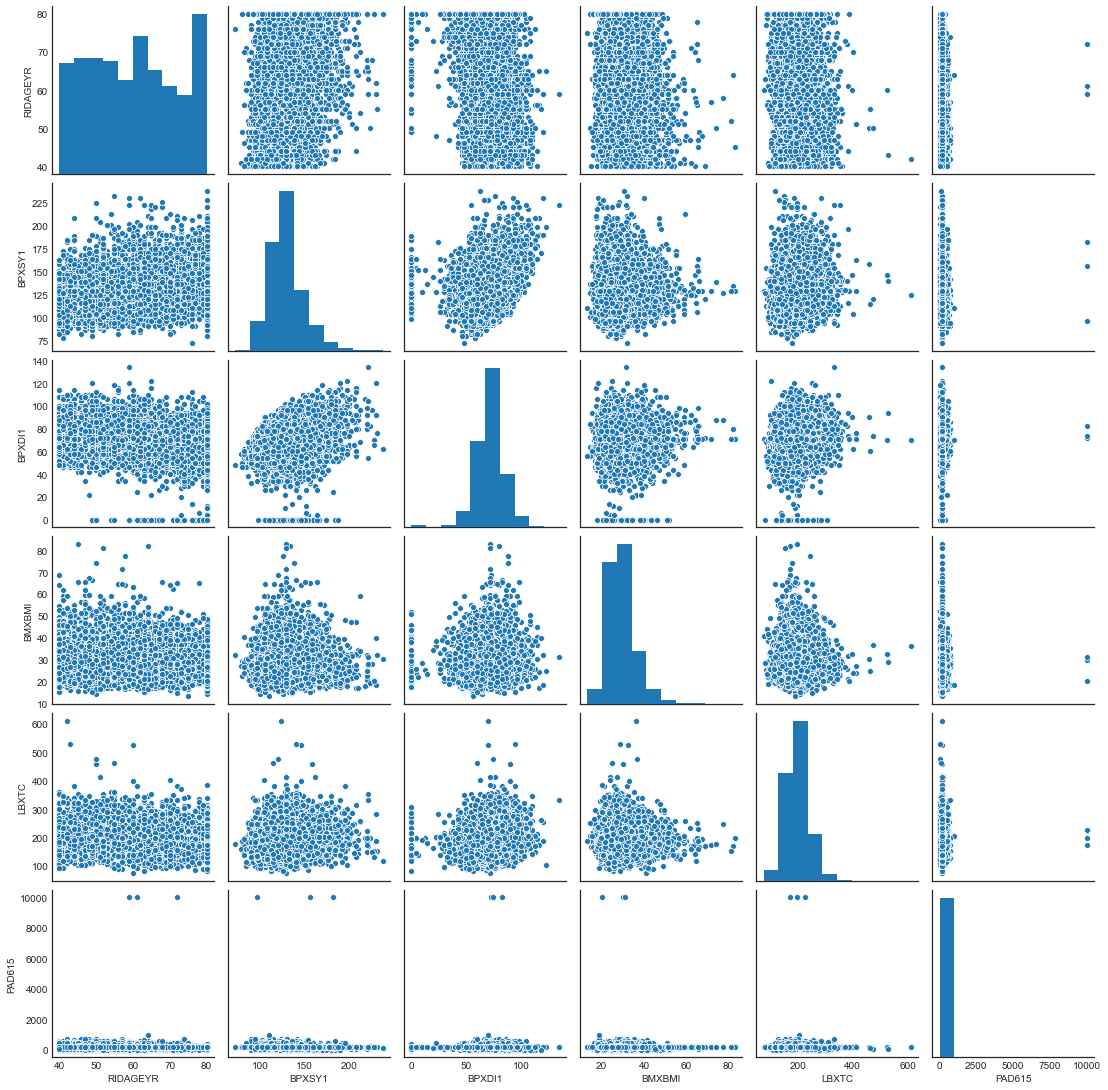

In [10]:
import seaborn as sns
df = pd.DataFrame(data_feature)
pairplot_fig = sns.pairplot(df)
pairplot_fig.savefig('pairplot1.png',dpi = 400)

In [11]:
data_for_cor = data_feature.drop(['PAD615'], axis = 1)
data_for_cor

,RIDAGEYR,BPXSY1,BPXDI1,BMXBMI,LBXTC
0,55.0,130.000000,80.000000,27.8,176.0
1,58.0,120.000000,76.000000,26.6,112.0
3,69.0,186.000000,102.000000,24.1,138.0
4,68.0,144.000000,74.000000,26.6,237.0
5,72.0,176.000000,44.000000,39.5,175.0
...,...,...,...,...,...
12015,55.0,116.000000,50.000000,22.2,226.0
12016,66.0,144.000000,42.000000,35.1,200.0
12017,47.0,116.000000,78.000000,24.7,232.0
12018,49.0,136.000000,60.000000,15.2,207.0


[0.3368547120541301, 0.284586416517525, 0.07888993120366422, 0.13326706489480347]


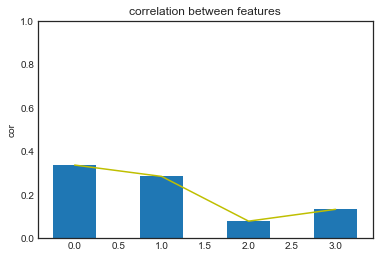

In [12]:
age = data_for_cor.RIDAGEYR.values

cor_list = []
# for i in range(data_feature.shape[1]-1):
cor_1 = np.corrcoef(data_for_cor.BPXSY1.values, age)
cor_list.append(abs(cor_1[0,1]))
cor_2 = np.corrcoef(data_for_cor.BPXDI1.values, age)
cor_list.append(abs(cor_2[0,1]))
cor_3 = np.corrcoef(data_for_cor.BMXBMI.values, age)
cor_list.append(abs(cor_3[0,1]))
cor_4 = np.corrcoef(data_for_cor.LBXTC.values, age)
cor_list.append(abs(cor_4[0,1]))
print(cor_list)
plt.plot(range(len(cor_list)),cor_list, c='y')
plt.bar(range(len(cor_list)),cor_list, width = 0.5)
plt.ylabel('cor')
plt.title('correlation between features')
plt.ylim([0,1])
plt.show()

## label the catogorical data

In [13]:
cat_cols = ["RIAGENDR", "SMQ020", "RIDRETH1", "DIQ010", "ALQ101"]
other_cols = ["RIDAGEYR", "BPXSY1","BPXDI1", "BMXBMI", "LBXTC", "PAD615"]

list = [df_train[other_cols]]

for i in cat_cols:
    df_train = pd.get_dummies(df_train, prefix=[i], columns = [i], drop_first=True)

y_train = df_train.status
X_train = df_train.drop(['status'], axis=1)
# X_train = X_train.drop(['BPXCHR'],axis = 1)
X_train = X_train.drop(['SEQN'],axis = 1)
X_train

,RIDAGEYR,BPXSY1,BPXDI1,BMXBMI,LBXTC,PAD615,RIAGENDR_2.0,SMQ020_2.0,SMQ020_7.0,SMQ020_9.0,RIDRETH1_2.0,RIDRETH1_3.0,RIDRETH1_4.0,RIDRETH1_5.0,DIQ010_2.0,DIQ010_3.0,DIQ010_9.0,ALQ101_2.0,ALQ101_9.0
0,55.0,130.000000,80.000000,27.8,176.0,194.29873,0,0,0,0,1,0,0,0,1,0,0,0,0
1,58.0,120.000000,76.000000,26.6,112.0,194.29873,0,0,0,0,0,0,1,0,0,0,0,0,0
3,69.0,186.000000,102.000000,24.1,138.0,194.29873,0,0,0,0,0,1,0,0,0,0,0,0,0
4,68.0,144.000000,74.000000,26.6,237.0,194.29873,1,0,0,0,0,0,0,0,0,0,0,0,0
5,72.0,176.000000,44.000000,39.5,175.0,194.29873,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,55.0,116.000000,50.000000,22.2,226.0,194.29873,1,0,0,0,0,0,1,0,1,0,0,0,0
12016,66.0,144.000000,42.000000,35.1,200.0,194.29873,1,0,0,0,0,0,1,0,1,0,0,0,0
12017,47.0,116.000000,78.000000,24.7,232.0,194.29873,0,0,0,0,0,0,0,1,1,0,0,0,0
12018,49.0,136.000000,60.000000,15.2,207.0,194.29873,1,0,0,0,0,1,0,0,1,0,0,0,0


In [14]:
for i in cat_cols:
    df_test = pd.get_dummies(df_test, prefix=[i], columns = [i], drop_first=True)

y_test  = df_test.status
X_test = df_test.drop(['status'], axis=1)
# X_test = X_test.drop(['BPXCHR'], axis = 1)
X_test = X_test.drop(['SEQN'], axis = 1)
X_test

,RIDAGEYR,BPXSY1,BPXDI1,BMXBMI,LBXTC,PAD615,RIAGENDR_2.0,SMQ020_2.0,RIDRETH1_2.0,RIDRETH1_3.0,RIDRETH1_4.0,RIDRETH1_5.0,DIQ010_2.0,DIQ010_3.0,DIQ010_9.0,ALQ101_2.0,ALQ101_9.0
1,65.0,124.0,74.0,33.3,210.0,200.599057,1,1,0,1,0,0,1,0,0,0,0
2,52.0,104.0,66.0,24.1,187.0,200.599057,0,0,0,0,1,0,1,0,0,0,0
3,65.0,194.0,106.0,41.0,237.0,200.599057,1,1,0,1,0,0,1,0,0,0,0
4,56.0,138.0,70.0,27.3,219.0,200.599057,0,1,0,0,0,0,1,0,0,0,0
5,57.0,128.0,84.0,21.1,163.0,200.599057,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,80.0,134.0,74.0,30.0,155.0,200.599057,0,0,0,1,0,0,1,0,0,0,0
3000,48.0,116.0,72.0,23.8,235.0,200.599057,1,1,0,1,0,0,1,0,0,0,0
3002,40.0,142.0,102.0,26.2,160.0,200.599057,0,1,0,0,0,1,1,0,0,0,0
3003,50.0,138.0,84.0,33.2,154.0,120.000000,1,1,0,1,0,0,1,0,0,0,0


### the first method to match in 'model establishment and measurement' part of dissertation

In [15]:
train_cols = X_train.columns
for col in train_cols:
    if col not in X_test:
        X_test.loc[:,col] = 0
        
# match columns
X_test = X_test[train_cols]

### the second method to match in 'contrast of models and exploration of the reason behind' part of dessertation

In [16]:
# train_cols = X_train.columns
# for col in train_cols:
#     if col not in X_test:
#         X_train = X_train.drop([col], axis=1)
# X_train

## establish and assess models

In [17]:
from sklearn.metrics import confusion_matrix
#use the model
rf = RandomForestClassifier() 

rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)

#print the score
print("training set score:{:.3f}".format(rf.score(X_train, y_train))) 
print("test set score:{:.3f}".format(rf.score(X_test,y_test)))

#print the confusion matrix
confusion_matrix(y_test, rf_predicted) 

training set score:1.000
test set score:0.735


array([[1969,   67],
       [ 654,   32]], dtype=int64)

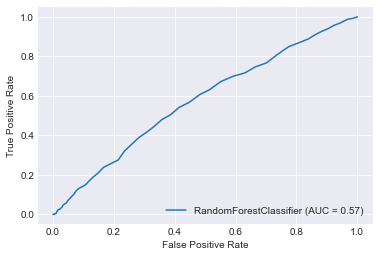

In [40]:
# plot_roc_curve(predicted, y_test)
metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

In [19]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

print(lr.coef_, lr.intercept_)

#print the score
print("training set score:{:.3f}".format(lr.score(X_train, y_train))) 
print("test set score:{:.3f}".format(lr.score(X_test,y_test)))

#print the confusion matrix
confusion_matrix(y_test, lr_predicted)

[[-6.38397057e-03 -1.29059334e-03 -4.22494279e-03  1.89486115e-02
  -1.99014222e-03 -2.54771591e-05  1.73756453e-01 -4.66566171e-01
   3.15976170e-03  6.08010936e-03 -7.70842492e-02  1.63400839e-01
   1.84732752e-02 -6.64364868e-02 -3.30498063e-01  3.03384467e-02
   2.40342945e-03  2.09570966e-02 -4.74796298e-03]] [-0.08687032]
training set score:0.749
test set score:0.749


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2035,    1],
       [ 683,    3]], dtype=int64)

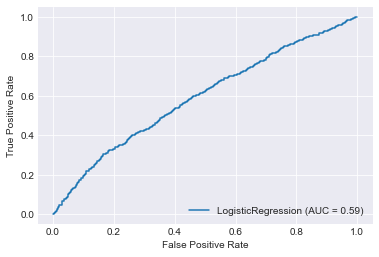

In [39]:
metrics.plot_roc_curve(lr, X_test, y_test)
plt.show()

In [21]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

#print the score
print("training set score:{:.3f}".format(knn.score(X_train, y_train))) 
print("test set score:{:.3f}".format(knn.score(X_test,y_test)))

#print the confusion matrix
confusion_matrix(y_test, knn_predicted) 

training set score:0.780
test set score:0.708


array([[1835,  201],
       [ 593,   93]], dtype=int64)

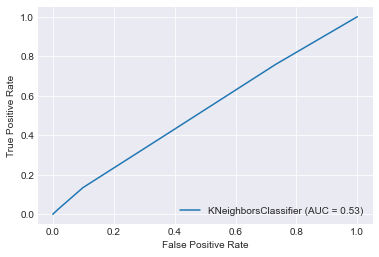

In [38]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

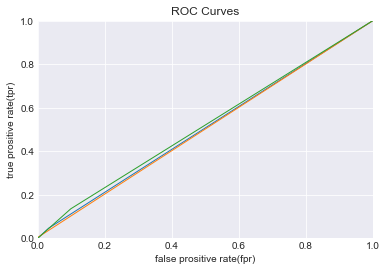

In [23]:
def rocs_plot(y_test_list, y_pred_list, setname=''):
#     plt.figure(figsize = (5,4), dpi = 100)
    plt.style.use('seaborn-darkgrid')
    
    for i, y_pred in enumerate(y_pred_list):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_list[i], y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw = 1, label = "AUC = %0.3f" % roc_auc)
    plt.xlim([0,1])
    plt.ylim([0,1])
#     plt.axis('equal')
    plt.xlabel('false prositive rate(fpr)')
    plt.ylabel('true prositive rate(tpr)')
    plt.title('ROC Curves')
    
y_test_list = [y_test, y_test, y_test]
y_pred_list = [rf_predicted, lr_predicted, knn_predicted]
rocs_plot(y_test_list, y_pred_list)

No handles with labels found to put in legend.


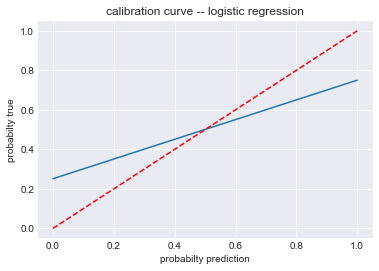

In [26]:
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines
prob_true, prob_pred = calibration_curve(y_test, lr_predicted, n_bins = 50)

plt.plot(prob_pred, prob_true)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('probabilty prediction')
plt.ylabel('probabilty true')
plt.title('calibration curve -- logistic regression')
plt.legend()
plt.show()

No handles with labels found to put in legend.


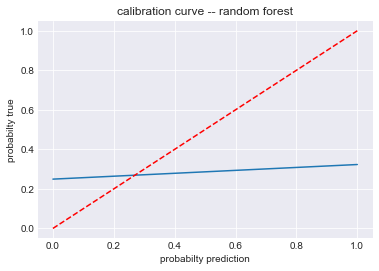

In [27]:
prob_true_1, prob_pred_1 = calibration_curve(y_test, rf_predicted, n_bins = 50)

plt.plot(prob_pred_1, prob_true_1)
plt.plot([0,1],[0,1], c = 'r', linestyle = 'dashed')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('probabilty prediction')
plt.ylabel('probabilty true')
plt.title('calibration curve -- random forest')
plt.legend()
plt.show()

## optimize the hyperparameters & check the overfitting

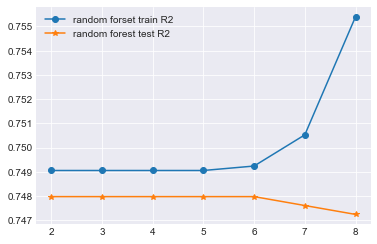

In [28]:
from sklearn.metrics import accuracy_score
rf_train_score = []
rf_test_score = []
for i in range(2, 9):
    rf_model = RandomForestClassifier(max_depth = i)
    rf_model.fit(X_train, y_train)
    rf_train_pred = rf_model.predict(X_train)
    train_acc = accuracy_score(y_train, rf_train_pred)
    rf_train_score.append(train_acc)
    
    rf_test_pred = rf_model.predict(X_test)
    test_acc = accuracy_score(y_test, rf_test_pred)
    rf_test_score.append(test_acc)
    
plt.plot(range(2, 9), rf_train_score, marker = 'o', label='random forset train R2')
plt.plot(range(2, 9), rf_test_score, marker = '*', label='random forest test R2')
plt.legend()
plt.show()

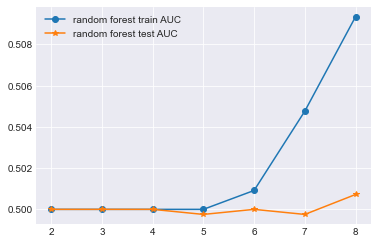

In [29]:
rf_train_auc = []
rf_test_auc = []
for i in range(2, 9):
    rf_model = RandomForestClassifier(max_depth = i)
    rf_model.fit(X_train, y_train)
    rf_train_pred = rf_model.predict(X_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_train, rf_train_pred)
    roc_auc_train = metrics.auc(fpr, tpr)
    rf_train_auc.append(roc_auc_train)
    
    rf_test_pred = rf_model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_test_pred)
    roc_auc_test = metrics.auc(fpr, tpr)
    rf_test_auc.append(roc_auc_test)
    
plt.plot(range(2, 9), rf_train_auc, marker = 'o', label='random forest train AUC')
plt.plot(range(2, 9), rf_test_auc, marker = '*', label='random forest test AUC')
plt.legend()
plt.show()

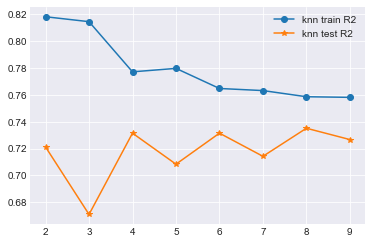

In [30]:
knn_train_score = []
knn_test_score = []
for i in range(2,10):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_train_pred = knn_model.predict(X_train)
    train_acc = accuracy_score(y_train, knn_train_pred)
    knn_train_score.append(train_acc)
    
    knn_test_pred = knn_model.predict(X_test)
    test_acc = accuracy_score(y_test, knn_test_pred)
    knn_test_score.append(test_acc)
    
plt.plot(range(2,10), knn_train_score, marker = 'o', label='knn train R2')
plt.plot(range(2,10), knn_test_score, marker = '*', label='knn test R2')
plt.legend()
plt.show()

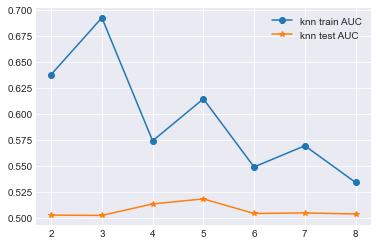

In [31]:
knn_train_auc = []
knn_test_auc = []
for i in range(2, 9):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_train_pred = knn_model.predict(X_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_train, knn_train_pred)
    roc_auc_train = metrics.auc(fpr, tpr)
    knn_train_auc.append(roc_auc_train)
    
    knn_test_pred = knn_model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_test_pred)
    roc_auc_test = metrics.auc(fpr, tpr)
    knn_test_auc.append(roc_auc_test)
    
plt.plot(range(2, 9), knn_train_auc, marker = 'o', label='knn train AUC')
plt.plot(range(2, 9), knn_test_auc, marker = '*', label='knn test AUC')
plt.legend()
plt.show()

## random forest: optimization without package (not very important)

In [32]:
def get_sample(data_set, n):
    rows = np.random.choice(len(data_set), n)
    tr = data_set.iloc[rows]
    x_tr = tr.iloc[:, 0: tr.shape[1] - 1]
    y_tr = tr.iloc[:, tr.shape[1] - 1]
    return x_tr, y_tr

def regErr(data_set):
    return np.var(data_set[:,-1])*shape(data_set)[0]

def regLeaf(data_set):
    return np.mean(data_set[:,-1])


def find_split(x, y):
    best = {'infogain' : np.inf}
    for i in range(x.shape[1]):
        for split in np.unique(x.iloc[:,i]):
            indices = np.arange(x.shape[0])
            going_left = x.iloc[indices, i] <= split
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            infogain = np.var(y.iloc[left_indices]) * len(left_indices) + np.var(y.iloc[right_indices]) * len(right_indices)
                                                                                            
            if infogain < best['infogain']:
                best = {'feature' : i,
                        'split' : split,
                        'infogain' : infogain, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices}
    return best

def gini(data_set):
    corr=0.0
    for i in set(data_set[:,-1]):
        corr += (len(np.nonzero(data_set[:,-1]==i)[0])/len(data_set))**2
    return 1-corr

def build_tree(x, y, max_depth):
    if max_depth == 1 or (y==y.iloc[0]).all():
        return {'leaf' : True, 'prediction' : y.mean()}
        
    else:
        move = find_split(x, y)
        
        left = build_tree(x.iloc[move['left_indices'],:], y.iloc[move['left_indices']], max_depth - 1)
        right = build_tree(x.iloc[move['right_indices'],:], y.iloc[move['right_indices']], max_depth - 1)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'infogain' : move['infogain'],
                'left' : left,
                'right' : right}
    
    
def predict(tree, samples):
    ret = np.empty(samples.shape[0], dtype=float)
    ret.fill(0.0)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['prediction']
        
        else:
            going_left = samples.iloc[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret

In [33]:
tree_for = []
X_tree = pd.concat([X_train, y_train],axis=1)

for i in range(7):
    x_tr, y_tr = get_sample(X_tree,500)
    tree_single = build_tree(x_tr, y_tr, 5)
    tree_for.append(tree_single)
        
pred_m = np.zeros(shape = (len(tree_for), len(y_test)))
for i in range(len(tree_for)):
    prediction = predict(tree_for[i], X_test)
    pred_m[i, :] = prediction
prediction_rfr = np.mean(pred_m, axis = 0)
# score(prediction_rfr, np.array(y_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_rfr)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5525425718982513


In [34]:
def score(pred_y, true_y):
    MSE = np.sum(np.power(pred_y - true_y,2)) / len(pred_y)
    RMSE = np.sqrt(MSE)
#     R2 = 1 - MSE / np.var(true_y)
    R2 = 1 - np.sum(np.power(pred_y - true_y,2)) / np.sum(np.power(true_y - np.mean(true_y),2))
    return R2

def draw_img(k, auc):
#     plt.figure(figsize = (15, 7))
    plt.ylabel('auc')
    plt.xlabel("hypermeter")
    plt.plot(k, auc)
    plt.legend()
    plt.show()

2 0.5443539610623929
3 0.5602550590822913
4 0.5783123170682811
5 0.579476493095133
6 0.5854054855172492
7 0.5833918046589952


No handles with labels found to put in legend.


8 0.579780782647047


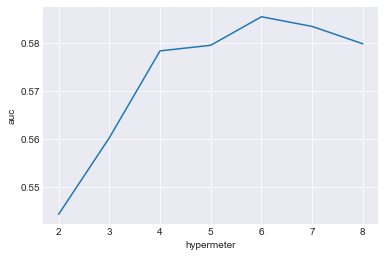

In [37]:
auc_lis = []
tree_number_lis = []
tree_for = []
for number in range(2,9):
    for i in range(number):
        x_tr, y_tr = get_sample(X_tree, 500)
        tree_single = build_tree(x_tr, y_tr, 5)
        tree_for.append(tree_single)
        
    pred_m = np.zeros(shape = (len(tree_for), len(y_test)))
    for i in range(len(tree_for)):
        prediction = predict(tree_for[i], X_test)
        pred_m[i, :] = prediction
    prediction_rfr = np.mean(pred_m, axis = 0)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_rfr)
    roc_auc = metrics.auc(fpr, tpr)
    auc_lis.append(roc_auc)
    tree_number_lis.append(number)
    print(number,roc_auc)
    
draw_img(tree_number_lis, auc_lis)